In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
394,395,50,RL,60.0,10134,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,109000
615,616,85,RL,80.0,8800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2010,WD,Abnorml,137500
769,770,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,538000
421,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
1429,1430,20,RL,NaN,12546,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2007,WD,Normal,182900


In [ ]:
mV = df.isnull().sum().sort_values(ascending=False)

<ipython-input-6-8f60e31a773c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mV.index, y=mV.values, palette='rocket')


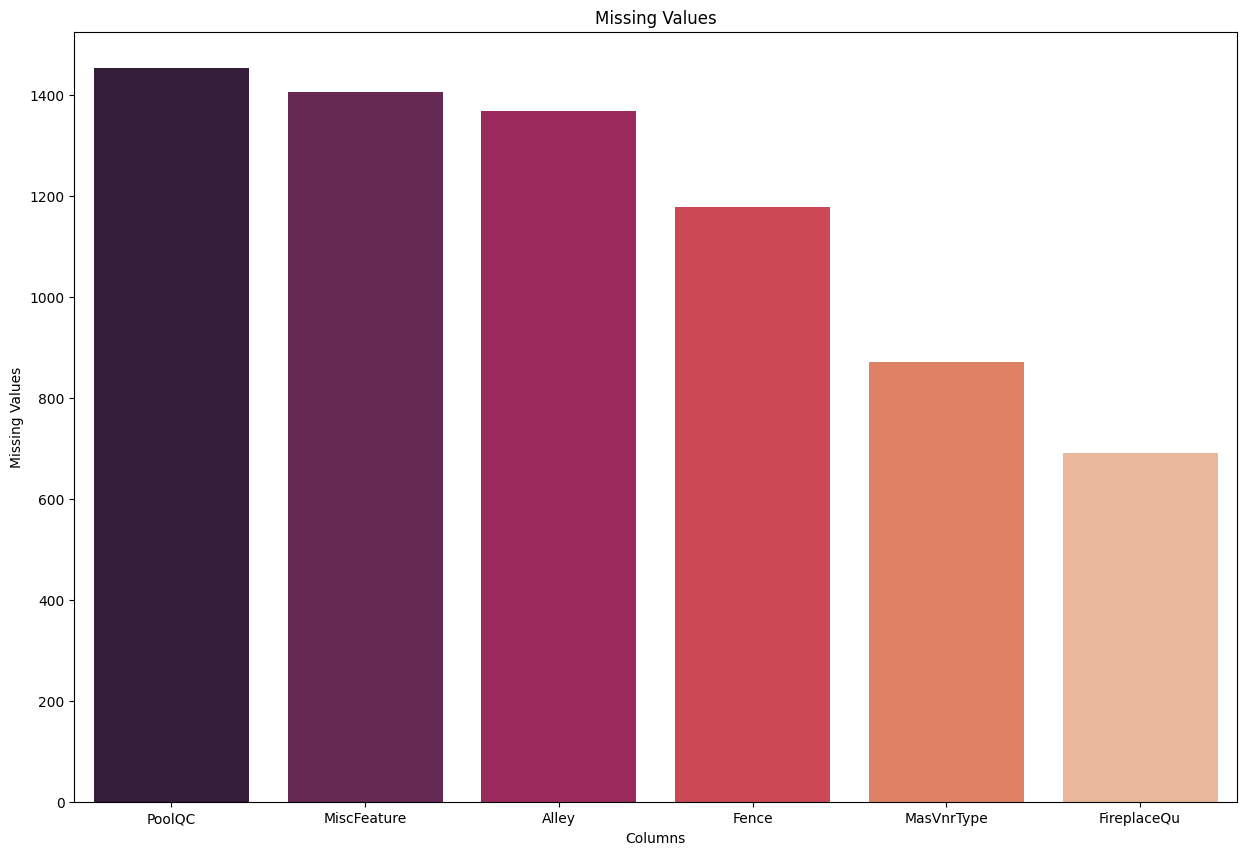

In [ ]:
mV = mV[mV>500]
plt.figure(figsize=(15,10))
sns.barplot(x=mV.index, y=mV.values, palette='rocket')
plt.title('Missing Values')
plt.xlabel('Columns')
plt.ylabel('Missing Values')
plt.show()

In [ ]:
df = df.drop(columns = ['Id'])
df = df.drop(columns = mV.index)

In [ ]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

In [ ]:
df.select_dtypes(include = ['object', 'category']).columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import KFold

In [ ]:
# ordinal_features = ['LotShape', 'LandSlope', 'ExterQual', 'ExterCond',
#                     'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
#                     'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional',
#                     'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive']

In [ ]:
# for feature in features:
#     le = LabelEncoder()
#     df[feature] = le.fit_transform(df[feature])

In [ ]:
# nominal_features = ['MSZoning', 'Street', 'LandContour', 'Utilities',
#                     'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
#                     'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
#                     'Exterior1st', 'Exterior2nd', 'Foundation', 'Heating',
#                     'CentralAir', 'Electrical', 'GarageType', 'SaleType',
#                     'SaleCondition']

In [ ]:
# for feature in nominal_features:
#     print(f'{feature}: {df[feature].nunique()} unique values')

In [ ]:
# low_cardinality_nominal_features = ['MSZoning', 'Street', 'LandContour', 'Utilities',
#                                    'LotConfig', 'BldgType', 'HouseStyle', 'RoofStyle',
#                                    'RoofMatl', 'Foundation', 'Heating', 'CentralAir',
#                                    'Electrical', 'GarageType', 'SaleType', 'SaleCondition']

In [ ]:
# ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# encoded_data = ohe.fit_transform(df[low_cardinality_nominal_features])
# encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(low_cardinality_nominal_features))
# df = pd.concat([df, encoded_df], axis=1)
# df.drop(low_cardinality_nominal_features, axis=1, inplace=True)

In [ ]:
# high_cardinality_nominal_features = ['Neighborhood', 'Condition1', 'Condition2', 'Exterior1st', 'Exterior2nd']
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
# target_variable = 'SalePrice'

# for feature in high_cardinality_nominal_features:
#     df[feature + '_target_encoded'] = 0

#     for train_index, val_index in kf.split(df):
#         target_means = df.iloc[train_index].groupby(feature)[target_variable].mean()
#         df.loc[val_index, feature + '_target_encoded'] = df.iloc[val_index][feature].map(target_means)

#     df.drop(feature, axis=1, inplace=True)

In [ ]:
features = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition']

for feature in features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])

In [ ]:
corr = df.corr()['SalePrice'].sort_values(ascending=False)
corr

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
...,...
GarageType,-0.415283
GarageFinish,-0.549247
KitchenQual,-0.589189
BsmtQual,-0.620886


In [ ]:
col = corr[(corr > 0.25) | (corr < -0.25)].index

In [ ]:
df = df[col]

In [ ]:
df = df.drop(columns = ['TotRmsAbvGrd', '2ndFlrSF', 'YearBuilt', 'GarageCars', 'Foundation', 'TotalBsmtSF', 'GarageYrBlt', 'GarageType'])

<Figure size 1500x1000 with 0 Axes>

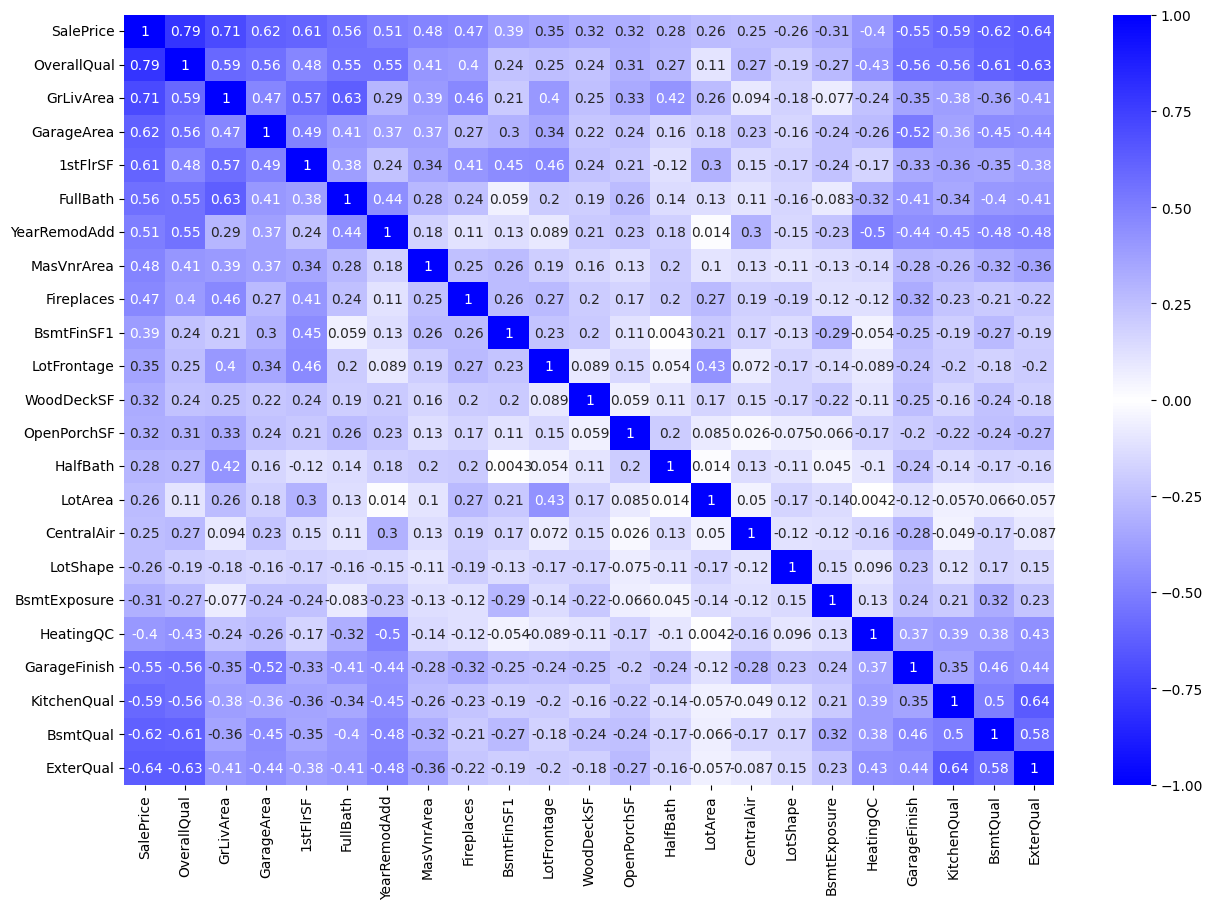

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

plt.figure(figsize=(15,10))
cmap = LinearSegmentedColormap.from_list('', ['blue', 'white', 'blue'])
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap=cmap, vmin=-1, vmax=1)
plt.show()

In [ ]:
df.sample(5)

,SalePrice,OverallQual,GrLivArea,GarageArea,1stFlrSF,FullBath,YearRemodAdd,MasVnrArea,Fireplaces,BsmtFinSF1,...,HalfBath,LotArea,CentralAir,LotShape,BsmtExposure,HeatingQC,GarageFinish,KitchenQual,BsmtQual,ExterQual
849,187000,6,1855,512,1094,2,1994,360.0,1,0,...,1,9600,1,3,3,0,1,3,3,2
25,256300,8,1600,890,1600,2,2007,640.0,1,0,...,0,14230,1,3,3,0,1,2,2,2
524,315750,7,2398,834,1383,2,1997,594.0,1,719,...,1,11787,1,0,3,0,0,2,2,2
409,339750,8,2078,836,1050,2,2008,100.0,1,789,...,1,10800,1,3,3,0,0,0,0,2
443,172500,7,1258,648,1258,2,2007,72.0,1,0,...,0,3922,1,3,0,0,0,2,0,2


In [ ]:
df.isnull().sum()

,0
SalePrice,0
OverallQual,0
GrLivArea,0
GarageArea,0
1stFlrSF,0
FullBath,0
YearRemodAdd,0
MasVnrArea,8
Fireplaces,0
BsmtFinSF1,0


In [ ]:
df['lot_frontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [ ]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [ ]:
from xgboost import XGBRegressor

model = XGBRegressor(
    objective='reg:squarederror',
    learning_rate=0.05,
    max_depth=3,
    n_estimators=1000,
    subsample=0.8,
    random_state=3,
)

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=3, ...)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
import sklearn.metrics as metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

MAE: 18399.368364726026
R2 Score: 0.8961954255807807


In [ ]:
import joblib

joblib.dump(model, 'house_pricing.pkl')

['house_pricing.pkl']